# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [32]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_airbnb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7780 non-null   int64  
 1   listing_url                                   7780 non-null   object 
 2   scrape_id                                     7780 non-null   int64  
 3   last_scraped                                  7780 non-null   object 
 4   source                                        7780 non-null   object 
 5   name                                          7780 non-null   object 
 6   description                                   7688 non-null   object 
 7   neighborhood_overview                         4683 non-null   object 
 8   picture_url                                   7780 non-null   object 
 9   host_id                                       7780 non-null   i

## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-426899805.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)


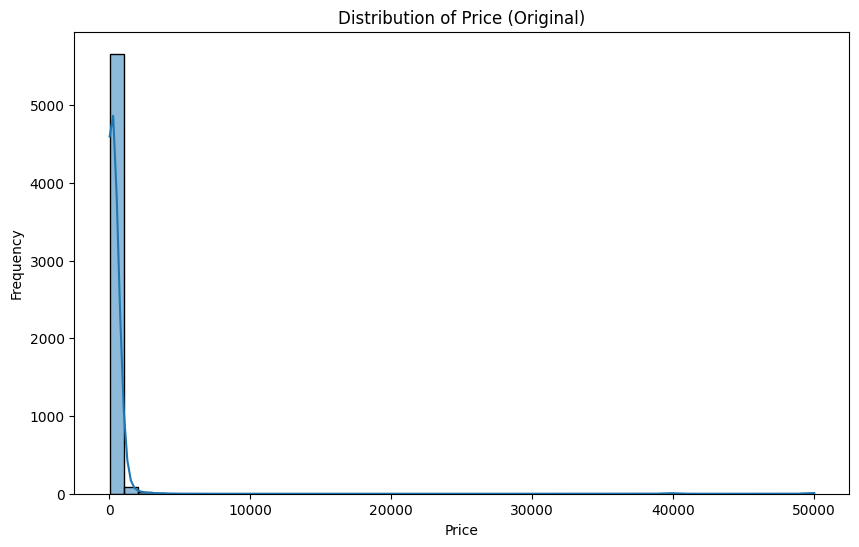

In [33]:
# Add code here 🔧
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)
df['price'] = pd.to_numeric(df['price'])

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price (Original)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

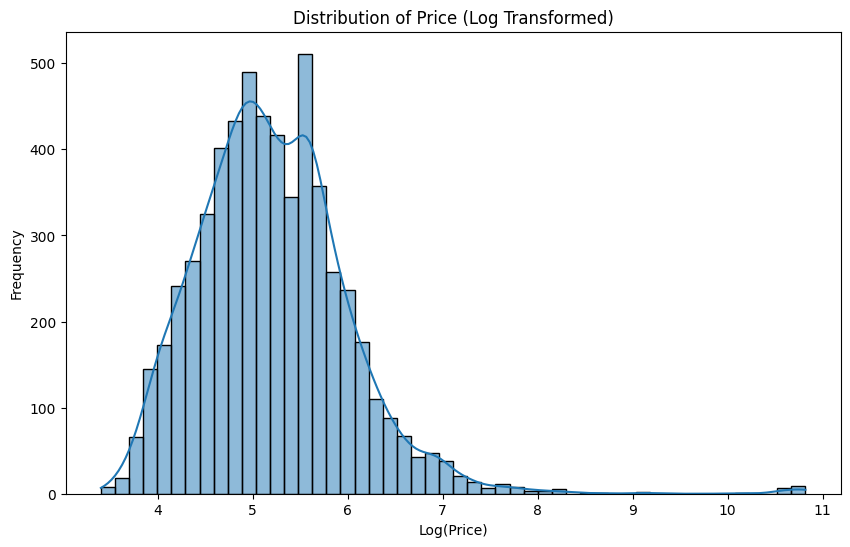

In [34]:
# Apply log transformation
df['price_log'] = np.log1p(df['price'])

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Price (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧
1. I examined price.

2. I chose to use a log transformation because the original 'price' histogram appeared to be right skewed.

3. The log transformation condensed the data, and made it easier to read and use in statistics since the data was no longer all at a single point, and therefor more normally distrubuted.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale
# Reshape the Series to a 2D array
price_reshaped = df['price'].values.reshape(-1, 1)
df['price_min_max'] = MinMaxScaler().fit_transform(price_reshaped)

# Z-score scale
# Choose another numeric column with a different value range, for example, 'number_of_reviews'
reviews_reshaped = df['number_of_reviews'].values.reshape(-1, 1)
df['reviews_zscore'] = StandardScaler().fit_transform(reviews_reshaped)

### ✍️ Your Response: 🔧
1. I scaled 'price' with MinMax scaling and 'reviews' with z score scaling.

2. Scaling puts data into a common range, which can be useful if comparing multiple data types that usually have different ranges if not scaled. Scaling also reduces the influence that outliers have on data, and therefore helps each datum contribute equally when doing analysis. For example, price usually woud have a few huge outliers that skew the data up, but scaling would make sure that lower values are equally represented, presenting you with a more accurate picture of what prices actually look like.

3. Airbnb staff who handle quality control and saftey would benefit from the scaled reviews data. The scaled data would accurately show what people think of Airbnb's properties, as a few good properties with lots of good reviews would not have as much influence. This scaling would also help staff find problematic or unsafe properties quicker, as these few bad reviews would actually show up in the scaled data, when previously they were likely swamped by properties with more reviews.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [36]:
# Add code here 🔧
df['reviews_grouped']=pd.qcut(df['number_of_reviews'], q=3, labels=['Low', 'Medium', 'High'])

### ✍️ Your Response: 🔧
1. I grouped the reviews column as asked in the business framing.

2. Someone would prefer the group view over the raw numbers when the want a snapshot of the data and want to see general trends. With raw data these things would be near impossible to see and interpret.

3. This would help Airbnb managers who want to see how customers interact with their group of managed properties. Compared to the company wide review rates, are the properties getting high or low numbers of reviews. Are these high or low rates indicative of something larger going on? Are the properties not exciting enough to bother leaving a review, or are people unaware of how to leave a review?

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

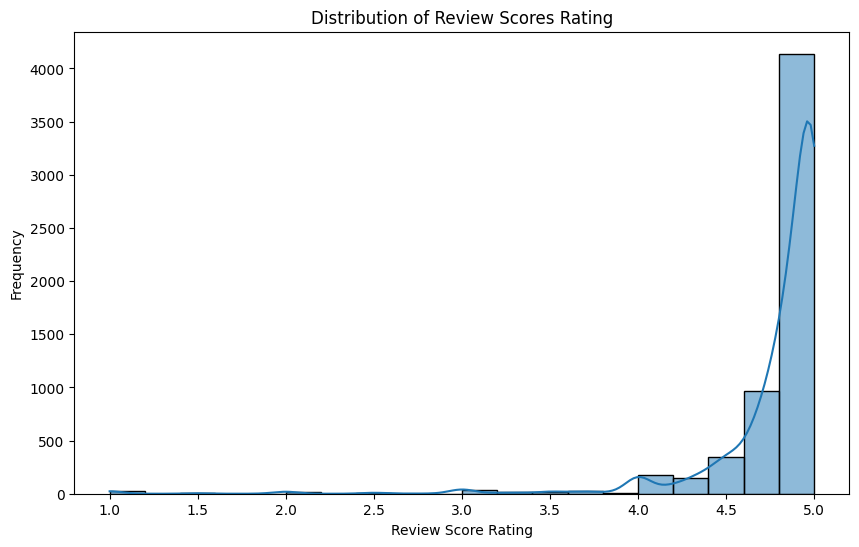

In [37]:
# Add code here 🔧
plt.figure(figsize=(10, 6))
sns.histplot(df['review_scores_rating'], bins=20, kde=True)
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Score Rating')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Add code here 🔧
df['reviews_by_price'] = df['number_of_reviews'] / df['price']
df['has_bad_reviews'] = df['review_scores_rating'] < 2.5

### ✍️ Your Response: 🔧 🔧
1. I created a column to show the relationship between price of stay and number of reviews, and a column to flag poor reviews.

2. A manager would use both of these new columns, as they would give insight into property and pricing preformance.

3. A manager could use the 'reviews by price' column to determine if pricing has an effect on how many reviews a property recieves. Perhaps they would want to increase pricing in order to make tenants feel a greater need to leave a review. More reviews may increase traffic to a property if they are good ones.

A manager could use the poor review flags to determine which properties need the most attention, and to prioritize these under-performing sites first.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [39]:
# Add code here 🔧
df = pd.get_dummies(df, columns=['neighbourhood_cleansed'], prefix=['nieghbourhood'])

### ✍️ Your Response: 🔧
1. I encoded the neighbourood cleansed column because it didn't have missing values like neighbourhood did.
2. I used one hot encoding
3. This transformation will allow neighbourhoods to be used in models and dashboards because they have been changed to numbers. Instead of having to read/look up neighbourhood types on your own, python can now display the amount and type of neighbourhoods because they have been encoded.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. I think the first log transformation felt the most important. Before transformaing the pricing data, the histogram meant almost nothing to me. After the transformation it was like night and day, as I could clearly see how pricing was distrubuted and could pick out some trends.

2. I think the neighbourhood encoding would be the most useful for a city planner, as they could understand their city and housing better because of the neighbourhood's conversion from object to encoded value.

3. I would use the converted neighbourhood data to color code the niegbourhood types and areas on a visualization dashboard. This could help new developers understand what types of neighbourhoods were where, and could also help new citizens decide where they would want to live.

4. This relates to my outcome of using data analytics for a greater good, as accurate Airbnb data and transformations will help hosts and managers make the platform safer and more efficient. Customers can quickly book and be certain that they can trust the information they are being given.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [41]:
!jupyter nbconvert --to html "assignment_07_PennerCaleb.ipynb"

[NbConvertApp] Converting notebook assignment_07_PennerCaleb.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 442475 bytes to assignment_07_PennerCaleb.html
